In [1]:
import pandas as pd
import numpy as np

# Load the dataset
df = pd.read_csv("C:\\Users\\HAKIMHAMRI\\Documents\\UMK KAMPUS KOTA\\TAHUN 3 SEM 5\\JIE42903 PENGKOMPUTERAN EVOLUSI\\project\\vrp_raw_dataset.csv")

# Display the first few rows and info
print(df.head())
print(df.info())

   node_id node_type         x         y  demand  vehicle_capacity
0        0     depot  0.504727  0.913050       0                30
1        1  customer  0.742493  0.489511       3                30
2        2  customer  0.385687  0.173131       4                30
3        3  customer  0.159046  0.576990       8                30
4        4  customer  0.437704  0.737633       9                30
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   node_id           21 non-null     int64  
 1   node_type         21 non-null     object 
 2   x                 21 non-null     float64
 3   y                 21 non-null     float64
 4   demand            21 non-null     int64  
 5   vehicle_capacity  21 non-null     int64  
dtypes: float64(2), int64(3), object(1)
memory usage: 1.1+ KB
None


In [4]:
def euclidean_distance(p1, p2):
    return np.sqrt((p1[0] - p2[0])**2 + (p1[1] - p2[1])**2)

def total_distance(route, coords):
    dist = 0
    for i in range(len(route) - 1):
        dist += euclidean_distance(coords[route[i]], coords[route[i+1]])
    # Return to depot
    dist += euclidean_distance(coords[route[-1]], coords[route[0]])
    return dist


In [6]:
param_grid = {
    'mu': [20, 30, 50],
    'lam': [100, 200, 300],
    'generations': [200, 500, 800]
}

best_params = None
best_dist = float('inf')

for mu in param_grid['mu']:
    for lam in param_grid['lam']:
        for gen in param_grid['generations']:
            print(f"Testing mu={mu}, lam={lam}, generations={gen}")
            solution, dist = evolution_strategy(coords, mu=mu, lam=lam, generations=gen)
            if dist < best_dist:
                best_dist = dist
                best_params = {'mu': mu, 'lam': lam, 'generations': gen}

print("Best Parameters:", best_params)
print("Best Distance:", best_dist)


Testing mu=20, lam=100, generations=200
Gen 0 | Best Distance = 8.04
Gen 50 | Best Distance = 4.39
Gen 100 | Best Distance = 4.31
Gen 150 | Best Distance = 4.30
Testing mu=20, lam=100, generations=500
Gen 0 | Best Distance = 7.93
Gen 50 | Best Distance = 5.01
Gen 100 | Best Distance = 4.32
Gen 150 | Best Distance = 4.31
Gen 200 | Best Distance = 4.31
Gen 250 | Best Distance = 4.31
Gen 300 | Best Distance = 4.31
Gen 350 | Best Distance = 4.31
Gen 400 | Best Distance = 4.31
Gen 450 | Best Distance = 4.31
Testing mu=20, lam=100, generations=800
Gen 0 | Best Distance = 7.60
Gen 50 | Best Distance = 4.12
Gen 100 | Best Distance = 4.08
Gen 150 | Best Distance = 4.08
Gen 200 | Best Distance = 4.08
Gen 250 | Best Distance = 4.08
Gen 300 | Best Distance = 4.08
Gen 350 | Best Distance = 4.08
Gen 400 | Best Distance = 4.08
Gen 450 | Best Distance = 4.08
Gen 500 | Best Distance = 4.08
Gen 550 | Best Distance = 4.08
Gen 600 | Best Distance = 4.08
Gen 650 | Best Distance = 4.08
Gen 700 | Best Distan


Testing mu=20, lam=100, generations=200
Gen 0 | Best Distance = 7.93
Gen 50 | Best Distance = 3.93
Gen 100 | Best Distance = 3.93
Gen 150 | Best Distance = 3.93
Distance = 3.93

Testing mu=20, lam=200, generations=200
Gen 0 | Best Distance = 7.97
Gen 50 | Best Distance = 3.99
Gen 100 | Best Distance = 3.93
Gen 150 | Best Distance = 3.93
Distance = 3.93

Testing mu=30, lam=100, generations=200
Gen 0 | Best Distance = 8.24
Gen 50 | Best Distance = 4.13
Gen 100 | Best Distance = 3.95
Gen 150 | Best Distance = 3.95
Distance = 3.95

Testing mu=30, lam=200, generations=200
Gen 0 | Best Distance = 7.91
Gen 50 | Best Distance = 3.93
Gen 100 | Best Distance = 3.93
Gen 150 | Best Distance = 3.93
Distance = 3.93

===== BEST PARAMETERS =====
{'mu': 20, 'lam': 100, 'generations': 200}
Best Distance: 3.9287194498941744


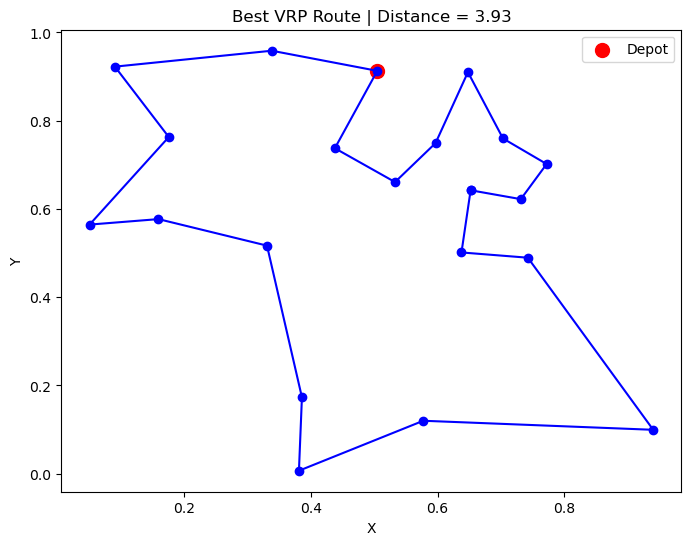

In [7]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

# =====================
# Load Data
# =====================
df = pd.read_csv("C:\\Users\\HAKIMHAMRI\\Documents\\UMK KAMPUS KOTA\\TAHUN 3 SEM 5\\JIE42903 PENGKOMPUTERAN EVOLUSI\\project\\vrp_raw_dataset.csv")
coords = df[['x', 'y']].values
n_points = len(coords)

# =====================
# Distance Functions
# =====================
def euclidean_distance(p1, p2):
    return np.sqrt((p1[0] - p2[0])**2 + (p1[1] - p2[1])**2)

def total_distance(route, coords):
    dist = 0
    for i in range(len(route) - 1):
        dist += euclidean_distance(coords[route[i]], coords[route[i+1]])
    dist += euclidean_distance(coords[route[-1]], coords[route[0]])  # Return to depot
    return dist

# =====================
# Mutations
# =====================
def swap_mutation(route):
    a, b = random.sample(range(len(route)), 2)
    route[a], route[b] = route[b], route[a]
    return route

def reverse_mutation(route):
    a, b = sorted(random.sample(range(len(route)), 2))
    route[a:b+1] = reversed(route[a:b+1])
    return route

def insert_mutation(route):
    a, b = random.sample(range(len(route)), 2)
    city = route.pop(a)
    route.insert(b, city)
    return route

def mutate(route):
    mutation_type = random.choice([swap_mutation, reverse_mutation, insert_mutation])
    return mutation_type(route.copy())

# =====================
# Evolution Strategy
# =====================
def evolution_strategy(coords, mu=30, lam=200, generations=500):
    population = [random.sample(range(n_points), n_points) for _ in range(mu)]
    
    best_solution = None
    best_distance = float('inf')
    
    for gen in range(generations):
        offspring = [mutate(random.choice(population)) for _ in range(lam)]
        combined = population + offspring
        combined.sort(key=lambda r: total_distance(r, coords))
        population = combined[:mu]
        
        current_best = population[0]
        current_distance = total_distance(current_best, coords)
        if current_distance < best_distance:
            best_distance = current_distance
            best_solution = current_best
        
        if gen % 50 == 0:
            print(f"Gen {gen} | Best Distance = {best_distance:.2f}")
    
    return best_solution, best_distance

# =====================
# Parameter Grid Search
# =====================
param_grid = {
    'mu': [20, 30],
    'lam': [100, 200],
    'generations': [200]
}

best_params = None
best_dist = float('inf')
best_route = None

for mu in param_grid['mu']:
    for lam in param_grid['lam']:
        for gen in param_grid['generations']:
            print(f"\nTesting mu={mu}, lam={lam}, generations={gen}")
            route, dist = evolution_strategy(coords, mu=mu, lam=lam, generations=gen)
            print(f"Distance = {dist:.2f}")
            if dist < best_dist:
                best_dist = dist
                best_params = {'mu': mu, 'lam': lam, 'generations': gen}
                best_route = route

print("\n===== BEST PARAMETERS =====")
print(best_params)
print("Best Distance:", best_dist)

# =====================
# Plot Best Route
# =====================
def plot_route(route, coords):
    route_coords = coords[route + [route[0]]]  # Return to start
    plt.figure(figsize=(8,6))
    plt.plot(route_coords[:,0], route_coords[:,1], 'o-', color='blue')
    plt.scatter(coords[0,0], coords[0,1], color='red', s=100, label='Depot')
    plt.title(f'Best VRP Route | Distance = {best_dist:.2f}')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.legend()
    plt.show()

plot_route(best_route, coords)


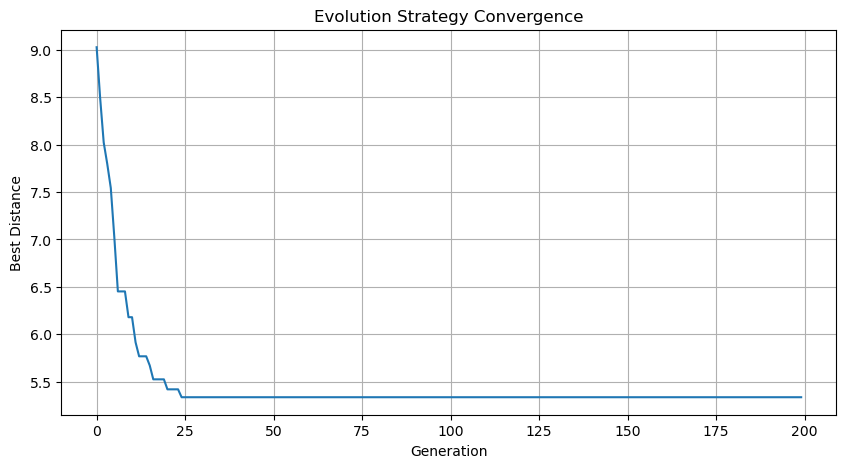

C:\Users\HAKIMHAMRI\AppData\Local\Temp\ipykernel_13324\2374806096.py:172: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab20', len(best_routes))


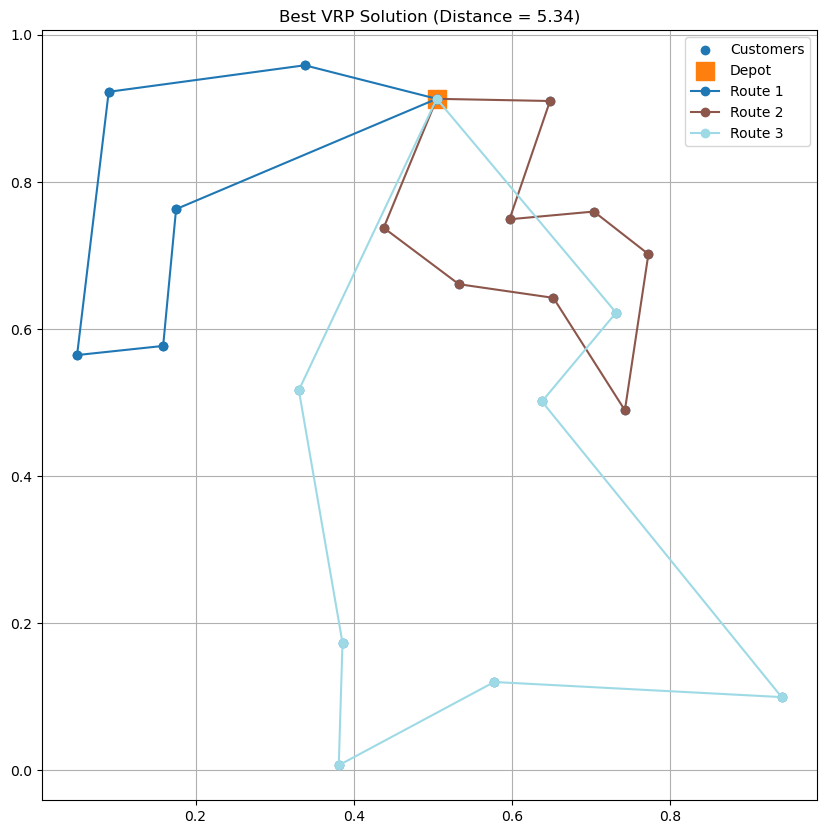


========== VRP EVOLUTION STRATEGY RESULTS ==========
Best Distance        : 5.3361
Number of Routes Used: 3
Runtime (seconds)    : 179.87s

Routes Detail:
Route 1: Depot -> 18 -> 3 -> 7 -> 20 -> 15 -> Depot
Route 2: Depot -> 4 -> 16 -> 10 -> 1 -> 12 -> 17 -> 9 -> 5 -> Depot
Route 3: Depot -> 8 -> 2 -> 14 -> 19 -> 11 -> 6 -> 13 -> Depot


In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time

# =========================
# LOAD DATA (example)
# =========================
# df must contain:
# node_id | x | y | demand | node_type | vehicle_capacity

# Example dummy data (REMOVE if you already load df)
"""
df = pd.DataFrame({
    'node_id': [0,1,2,3,4,5],
    'x': [50,20,60,30,70,10],
    'y': [50,40,20,60,10,80],
    'demand': [0,10,15,20,10,5],
    'node_type': ['depot','customer','customer','customer','customer','customer'],
    'vehicle_capacity': [0,30,30,30,30,30]
})
"""

# =========================
# PREPROCESSING
# =========================
depot = df[df['node_type'] == 'depot'].iloc[0]
customers = df[df['node_type'] == 'customer'].copy()
capacity = customers['vehicle_capacity'].iloc[0]

coords = df[['x', 'y']].values
node_ids = df['node_id'].values

# Distance Matrix
dist_matrix = np.sqrt(
    np.sum((coords[:, None, :] - coords[None, :, :]) ** 2, axis=2)
)

# =========================
# FITNESS FUNCTION
# =========================
def calculate_fitness(permutation):
    total_distance = 0
    current_load = 0
    current_node = depot['node_id']

    for cust_id in permutation:
        demand = customers.loc[
            customers['node_id'] == cust_id, 'demand'
        ].values[0]

        if current_load + demand > capacity:
            total_distance += dist_matrix[current_node, depot['node_id']]
            current_node = depot['node_id']
            current_load = 0

        total_distance += dist_matrix[current_node, cust_id]
        current_node = cust_id
        current_load += demand

    total_distance += dist_matrix[current_node, depot['node_id']]
    return total_distance

# =========================
# ROUTE CONSTRUCTION
# =========================
def get_routes(permutation):
    routes = []
    current_route = []
    current_load = 0

    for cust_id in permutation:
        demand = customers.loc[
            customers['node_id'] == cust_id, 'demand'
        ].values[0]

        if current_load + demand > capacity:
            routes.append(current_route)
            current_route = []
            current_load = 0

        current_route.append(cust_id)
        current_load += demand

    if current_route:
        routes.append(current_route)

    return routes

# =========================
# EVOLUTION STRATEGY PARAMS
# =========================
mu = 20
lam = 200
generations = 200

customer_ids = customers['node_id'].values
num_customers = len(customer_ids)

# =========================
# INITIALIZATION
# =========================
population = [np.random.permutation(customer_ids) for _ in range(mu)]
fitnesses = [calculate_fitness(ind) for ind in population]

history = []

# =========================
# START TIMER
# =========================
start_time = time.time()

# =========================
# EVOLUTION LOOP
# =========================
for gen in range(generations):
    offspring = []

    for _ in range(lam):
        parent = population[np.random.randint(mu)]
        child = parent.copy()

        # Inversion Mutation
        i, j = sorted(np.random.choice(num_customers, 2, replace=False))
        child[i:j] = child[i:j][::-1]

        offspring.append(child)

    offspring_fitness = [calculate_fitness(ind) for ind in offspring]

    # (mu + lambda) selection
    combined_pop = population + offspring
    combined_fit = fitnesses + offspring_fitness

    best_idx = np.argsort(combined_fit)[:mu]
    population = [combined_pop[i] for i in best_idx]
    fitnesses = [combined_fit[i] for i in best_idx]

    history.append(fitnesses[0])

# =========================
# END TIMER
# =========================
runtime = time.time() - start_time

# =========================
# RESULTS
# =========================
best_individual = population[0]
best_fitness = fitnesses[0]
best_routes = get_routes(best_individual)

# =========================
# VISUALIZATION 1: CONVERGENCE
# =========================
plt.figure(figsize=(10, 5))
plt.plot(history)
plt.xlabel("Generation")
plt.ylabel("Best Distance")
plt.title("Evolution Strategy Convergence")
plt.grid()
plt.savefig("convergence.png")
plt.show()

# =========================
# VISUALIZATION 2: BEST ROUTE
# =========================
plt.figure(figsize=(10, 10))
plt.scatter(customers['x'], customers['y'], label='Customers')
plt.scatter(depot['x'], depot['y'], marker='s', s=150, label='Depot')

colors = plt.cm.get_cmap('tab20', len(best_routes))
for i, route in enumerate(best_routes):
    full_route = [depot['node_id']] + route + [depot['node_id']]
    route_coords = coords[full_route]
    plt.plot(route_coords[:, 0], route_coords[:, 1], marker='o',
             label=f'Route {i+1}', color=colors(i))

plt.title(f"Best VRP Solution (Distance = {best_fitness:.2f})")
plt.legend()
plt.grid()
plt.savefig("vrp_solution.png")
plt.show()

# =========================
# PRINT SUMMARY
# =========================
print("\n========== VRP EVOLUTION STRATEGY RESULTS ==========")
print(f"Best Distance        : {best_fitness:.4f}")
print(f"Number of Routes Used: {len(best_routes)}")
print(f"Runtime (seconds)    : {runtime:.2f}s\n")

print("Routes Detail:")
for i, route in enumerate(best_routes):
    print(f"Route {i+1}: Depot -> {' -> '.join(map(str, route))} -> Depot")
